# Predicting the median house price in London Wards

In [ ]:
The following Jupyter notebook analyses the dataset ** Ward Profiles and Atlas of Greater London Authority (GLA)** provided by **__[DataStore London](https://data.london.gov.uk/dataset/ward-profiles-and-atlas)__**. Although the provided details refelct London profile until 2015, this is the most comrehensive dataset publicly available that cover data from the 2011 Census, from ONS and governmental data. 

The dataset contains several social and demographic data. However, my objective is to identify  the best set of predictor of **Median House Price** in London Wards. 

* The report includes two sequences: 
    * **Data cleaning** and preparation for analysis
    * Developing a **Multiple regression analysis** model.  

In [1]:
# Importing relevant packages with their ali
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as pet
%matplotlib inline

import seaborn as sns

import numpy as np

In [2]:
## Importing the "London wards socio-demographic profiling" dataset

demographics = pd.read_excel (r'https://data.london.gov.uk/download/ward-profiles-and-atlas/a187b63e-bf4f-4449-b644-ab86a0a8569d/ward-profiles-excel-version.xls', sheet_name='Data')

In [3]:
demographics.shape

(661, 67)

In [4]:
## Observe the last 20 rows
demographics.tail(20)



,Ward name,Old code,New code,Population - 2015,Children aged 0-15 - 2015,Working-age (16-64) - 2015,Older people aged 65+ - 2015,% All Children aged 0-15 - 2015,% All Working-age (16-64) - 2015,% All Older people aged 65+ - 2015,...,A-Level Average Point Score Per Student - 2013/14,A-Level Average Point Score Per Entry; 2013/14,Crime rate - 2014/15,Violence against the person rate - 2014/15,"Deliberate Fires per 1,000 population - 2014",% area that is open space - 2014,Cars per household - 2011,Average Public Transport Accessibility score - 2014,% travel by bicycle to work - 2011,Turnout at Mayoral election - 2012
641,Hillingdon,00AS,E09000017,289500,61100,190500,37900,21.0978,65.8057,13.0965,...,701.5,210.5,67.1813,24.1522,0.686875,45.0364,1.22224,2.36309,1.48592,36.3742
642,Hounslow,00AT,E09000018,263600,55150,178900,29550,20.9218,67.8752,11.203,...,681.3,210.2,74.9523,24.2486,0.529711,37.5033,0.990938,3.03052,3.27477,34.0653
643,Islington,00AU,E09000019,220800,35100,166750,18950,15.8869,75.5292,8.58385,...,661.5,209,114.079,31.8454,0.510046,13.6968,0.412897,5.74292,9.55744,40.8182
644,Kensington and Chelsea,00AW,E09000020,161700,25350,114300,22050,15.6791,70.6791,13.6418,...,685.5,210.1,115.525,25.8493,0.122113,19.7659,0.567078,5.79307,4.8595,36.1825
645,Kingston upon Thames,00AX,E09000021,167200,32200,112700,22300,19.2659,67.3883,13.3458,...,729.7,215.2,55.6858,15.828,0.383709,36.9224,1.10657,2.92825,4.08873,40.8788
646,Lambeth,00AY,E09000022,320450,57150,238750,24500,17.8319,74.5147,7.65339,...,661.4,208.7,104.77,30.3206,0.480521,20.6749,0.51371,5.04711,8.08137,36.9592
647,Lewisham,00AZ,E09000023,293050,60600,205500,27000,20.6714,70.1189,9.2097,...,662.9,205.9,78.0173,25.8369,0.468237,22.1376,0.659026,4.08989,3.95055,37.2664
648,Merton,00BA,E09000024,206200,42450,138600,25150,20.5841,67.2076,12.2083,...,688.6,211.2,57.0605,16.007,0.285401,35.8902,0.92407,3.40559,3.36189,41.3067
649,Newham,00BB,E09000025,338000,75100,240500,22400,22.2185,71.1512,6.63027,...,647.2,206.2,90.9728,25.7395,0.823312,29.8895,0.601779,3.90578,1.6904,33.0119
650,Redbridge,00BC,E09000026,292450,67000,189850,35600,22.9076,64.9133,12.1791,...,686.8,212.2,69.5316,20.2656,0.312205,40.3077,1.07299,2.98215,1.13159,36.9856


The initial dataset included 661 rows and 67 columns (variables/ features). Using the **.tail** function it can be observed data for England and for London Boroughs are included at the end of the dataset. Consequently, these rows were excluded from dataset.   

In [5]:
## It looks the dataset includes national and borough levels data. 
## To observe I Created a list including only the wards
wards = demographics ['Ward name']

print(list(wards))

## As City of London appears both as Ward level and also as Borough Level ... the top case (index 0) will be excluded 
## This suggest Boroughs, London and England Overall are included in the dataset 
## They will be eliminated 

['City of London', 'Barking and Dagenham - Abbey', 'Barking and Dagenham - Alibon', 'Barking and Dagenham - Becontree', 'Barking and Dagenham - Chadwell Heath', 'Barking and Dagenham - Eastbrook', 'Barking and Dagenham - Eastbury', 'Barking and Dagenham - Gascoigne', 'Barking and Dagenham - Goresbrook', 'Barking and Dagenham - Heath', 'Barking and Dagenham - Longbridge', 'Barking and Dagenham - Mayesbrook', 'Barking and Dagenham - Parsloes', 'Barking and Dagenham - River', 'Barking and Dagenham - Thames', 'Barking and Dagenham - Valence', 'Barking and Dagenham - Village', 'Barking and Dagenham - Whalebone', 'Barnet - Brunswick Park', 'Barnet - Burnt Oak', 'Barnet - Childs Hill', 'Barnet - Colindale', 'Barnet - Coppetts', 'Barnet - East Barnet', 'Barnet - East Finchley', 'Barnet - Edgware', 'Barnet - Finchley Church End', 'Barnet - Garden Suburb', 'Barnet - Golders Green', 'Barnet - Hale', 'Barnet - Hendon', 'Barnet - High Barnet', 'Barnet - Mill Hill', 'Barnet - Oakleigh', 'Barnet - To

In [6]:
## A list of names for the Rows to be excluded was created 

excluded = 'Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster', 'London', 'England', 'Source:'

In [7]:
## The "excluded" list elements were eliminated from demographics dataset 
demographics = demographics.drop(demographics[demographics['Ward name'].isin(excluded)].index.tolist())
demographics['Ward name']
### the dataset was reduced to 626 Rows ... 

0                             City of London
1               Barking and Dagenham - Abbey
2              Barking and Dagenham - Alibon
3           Barking and Dagenham - Becontree
4      Barking and Dagenham - Chadwell Heath
                       ...                  
621             Westminster - Vincent Square
622                    Westminster - Warwick
623                 Westminster - Westbourne
624                   Westminster - West End
625                           City of London
Name: Ward name, Length: 626, dtype: object

In [8]:
## Exclude row with index 0 as City of London appears also in row 625 as borough. 

demographics = demographics.drop([0])
demographics['Ward name']

1               Barking and Dagenham - Abbey
2              Barking and Dagenham - Alibon
3           Barking and Dagenham - Becontree
4      Barking and Dagenham - Chadwell Heath
5           Barking and Dagenham - Eastbrook
                       ...                  
621             Westminster - Vincent Square
622                    Westminster - Warwick
623                 Westminster - Westbourne
624                   Westminster - West End
625                           City of London
Name: Ward name, Length: 625, dtype: object

## As the wards names included the Borough and Ward they were separated in 2 columns. 

In [9]:
### Add and ID case number to each ward 
demographics ['ID_case'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625]

demographics.head()

,Ward name,Old code,New code,Population - 2015,Children aged 0-15 - 2015,Working-age (16-64) - 2015,Older people aged 65+ - 2015,% All Children aged 0-15 - 2015,% All Working-age (16-64) - 2015,% All Older people aged 65+ - 2015,...,A-Level Average Point Score Per Entry; 2013/14,Crime rate - 2014/15,Violence against the person rate - 2014/15,"Deliberate Fires per 1,000 population - 2014",% area that is open space - 2014,Cars per household - 2011,Average Public Transport Accessibility score - 2014,% travel by bicycle to work - 2011,Turnout at Mayoral election - 2012,ID_case
1,Barking and Dagenham - Abbey,00ABFX,E05000026,14750,3850,10150,750,25.9583,69.0142,5.02748,...,208.937,138.139,42.2373,1.35308,21.9086,0.547682,5.98936,0.801603,25.6889,1
2,Barking and Dagenham - Alibon,00ABFY,E05000027,10600,2700,6800,1050,25.7013,64.2769,10.0217,...,201.599,73.5898,27.2642,0.653778,20.6218,0.81516,3.14589,1.02041,20.3479,2
3,Barking and Dagenham - Becontree,00ABFZ,E05000028,12700,3200,8350,1100,25.3704,65.9127,8.7169,...,207.901,79.9041,27.6378,1.18963,1.88545,0.870236,2.87177,1.64741,22.5382,3
4,Barking and Dagenham - Chadwell Heath,00ABGA,E05000029,10400,2550,6400,1450,24.3269,61.5,14.1731,...,210.457,76.1252,24.6154,1.25144,55.9745,0.918062,2.26091,1.17467,25.3188,4
5,Barking and Dagenham - Eastbrook,00ABGB,E05000030,10750,2150,7050,1550,20.0966,65.6668,14.2366,...,206.836,66.6667,24.4651,0.825158,50.4342,1.06046,2.30572,1.55783,24.1215,5


In [10]:
## Spliting the Ward Name Column which includes Borough and Ward into Borough and Wards as separate columns 
d2 = demographics['Ward name'].str.partition('-')[[0,1,2]]

d2.columns = ['Borough', '11','Ward']
## Droping the column which includes the hyphen (separation marker)
d3 = d2.drop(['11'], axis=1)

### Add and ID case number to each ward 
d3['ID_case'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625]

d3

## Dataset including ID-case Borough and ward was created. 

,Borough,Ward,ID_case
1,Barking and Dagenham,Abbey,1
2,Barking and Dagenham,Alibon,2
3,Barking and Dagenham,Becontree,3
4,Barking and Dagenham,Chadwell Heath,4
5,Barking and Dagenham,Eastbrook,5
...,...,...,...
621,Westminster,Vincent Square,621
622,Westminster,Warwick,622
623,Westminster,Westbourne,623
624,Westminster,West End,624


In [11]:
## Joining the 2 dataframes to have a Column with Ward name only 

Demographics_London = d3.merge(demographics, left_on = 'ID_case', right_on = 'ID_case')

Demographics_London.head()

,Borough,Ward,ID_case,Ward name,Old code,New code,Population - 2015,Children aged 0-15 - 2015,Working-age (16-64) - 2015,Older people aged 65+ - 2015,...,A-Level Average Point Score Per Student - 2013/14,A-Level Average Point Score Per Entry; 2013/14,Crime rate - 2014/15,Violence against the person rate - 2014/15,"Deliberate Fires per 1,000 population - 2014",% area that is open space - 2014,Cars per household - 2011,Average Public Transport Accessibility score - 2014,% travel by bicycle to work - 2011,Turnout at Mayoral election - 2012
0,Barking and Dagenham,Abbey,1,Barking and Dagenham - Abbey,00ABFX,E05000026,14750,3850,10150,750,...,682.57,208.937,138.139,42.2373,1.35308,21.9086,0.547682,5.98936,0.801603,25.6889
1,Barking and Dagenham,Alibon,2,Barking and Dagenham - Alibon,00ABFY,E05000027,10600,2700,6800,1050,...,627.928,201.599,73.5898,27.2642,0.653778,20.6218,0.81516,3.14589,1.02041,20.3479
2,Barking and Dagenham,Becontree,3,Barking and Dagenham - Becontree,00ABFZ,E05000028,12700,3200,8350,1100,...,631.958,207.901,79.9041,27.6378,1.18963,1.88545,0.870236,2.87177,1.64741,22.5382
3,Barking and Dagenham,Chadwell Heath,4,Barking and Dagenham - Chadwell Heath,00ABGA,E05000029,10400,2550,6400,1450,...,613.944,210.457,76.1252,24.6154,1.25144,55.9745,0.918062,2.26091,1.17467,25.3188
4,Barking and Dagenham,Eastbrook,5,Barking and Dagenham - Eastbrook,00ABGB,E05000030,10750,2150,7050,1550,...,670.104,206.836,66.6667,24.4651,0.825158,50.4342,1.06046,2.30572,1.55783,24.1215


#### The dataset were joined into a new dataframe **Demographics_London**. Som of the variables of interest were renamed and some were transformed in integers for the next part of the analysis.   

In [12]:
# Rename Variables 
Demographics_London = Demographics_London.rename(columns={'Borough':'BOROUGH',
                        'Mean Age - 2013': 'Mean Age', 
                        '% All Working-age (16-64) - 2015': '%_Working_age',
                        'Number of properties sold - 2014': 'Sold_properties',
                        '% All Children aged 0-15 - 2015':'% Children 0-15',
                        'Population - 2015': 'Population', 
                        'Median Age - 2013': 'Median Age',
                        'Population density (persons per sq km) - 2013': 'Population density', 
                        'Median House Price (£) - 2014': 'Median House Price',
                        'Median Household income estimate (2012/13)': 'Median Household income',
                        '% Households Owned - 2011': '% Owners',
                        '% detached houses - 2011': 'Detached Houses',                        
                        '% Flat, maisonette or apartment - 2011': 'Flats',
                        '% Households Social Rented - 2011': '% Social Rents',                        
                        '% Households Private Rented - 2011': 'Private Rents',
                        '% dwellings in council tax bands A or B - 2015': '% Council tax A/B',                        
                        '% with Level 4 qualifications and above - 2011': '% University studies',                                                                       
                        '% area that is open space - 2014': '% Open Space', 
                        'Turnout at Mayoral election - 2012':'Turnout Mayoral election',
                        'Crime rate - 2014/15': 'Crime rate',                                                                        
                        '% BAME - 2011': '% BAME',
                        '% Not Born in UK - 2011': '% Not Born in UK',
                        '% of lone parents not in employment - 2011': '% Unemployed lone parents',
                        'Cars per household - 2011': 'Cars per household',
                        '% of households with no adults in employment with dependent children - 2011': '% Unemployed adults + dependent children'})  



In [13]:
## As the columns format is inconsistent all are coerced to be integers. 

Demographics_London['Population'] = Demographics_London['Population'].astype(int)
Demographics_London['% Not Born in UK'] = Demographics_London['% Not Born in UK'].astype(int)
Demographics_London['% BAME'] = Demographics_London['% BAME'].astype(int)
Demographics_London['% Children 0-15'] = Demographics_London['% Children 0-15'].astype(int)
Demographics_London['%_Working_age'] = Demographics_London['%_Working_age'].astype(int)
Demographics_London['Mean Age'] = Demographics_London['Mean Age'].astype(int)
Demographics_London['Area - Square Kilometres'] = Demographics_London['Area - Square Kilometres'].astype(int)
Demographics_London['Population density'] = Demographics_London['Population density'].astype(int)
Demographics_London['Median House Price'] = Demographics_London['Median House Price'].astype(int)
Demographics_London['Sold_properties'] = Demographics_London['Sold_properties'].astype(int)
Demographics_London['Median Household income'] = Demographics_London['Median Household income'].astype(int)
Demographics_London['Detached Houses'] = Demographics_London['Detached Houses'].astype(int)
Demographics_London['% semi-detached houses - 2011'] = Demographics_London['% semi-detached houses - 2011'].astype(int)
Demographics_London['% terraced houses - 2011'] = Demographics_London['% terraced houses - 2011'].astype(int)
Demographics_London['Flats'] = Demographics_London['Flats'].astype(int)
Demographics_London['% Owners'] = Demographics_London['% Owners'].astype(int)
Demographics_London['% Social Rents'] = Demographics_London['% Social Rents'].astype(int)
Demographics_London['Private Rents'] = Demographics_London['Private Rents'].astype(int)
Demographics_London['% Council tax A/B'] = Demographics_London['% Council tax A/B'].astype(int)
Demographics_London['% University studies'] = Demographics_London['% University studies'].astype(int)
Demographics_London['% Open Space'] = Demographics_London['% Open Space'].astype(int)
Demographics_London['% travel by bicycle to work - 2011'] = Demographics_London['% travel by bicycle to work - 2011'].astype(int)
Demographics_London['Turnout Mayoral election'] = Demographics_London['Turnout Mayoral election'].astype(int)
Demographics_London['Crime rate'] = Demographics_London['Crime rate'].astype(int)
Demographics_London['% Unemployed lone parents'] = Demographics_London['% Unemployed lone parents'].astype(int)
Demographics_London['Cars per household'] = Demographics_London['Cars per household'].astype(int)
Demographics_London['% Unemployed adults + dependent children'] = Demographics_London['% Unemployed adults + dependent children'].astype(int)

Before going further with the development of the Multiple Regression model the **swarmplot** and **boxplot** below indicate the distribution of median house prices per ward in different boroughs. There are some outliers which I will ignore in this notebook. Overall some boroughs have a low price variability (e.g. Newham, Barking and Dagenham) while **Kensington and Chelsea**, **Richmond upen Thames** and **Westminster** have a high price variation between wards.  

In [14]:
Demographics_London.dropna()

,BOROUGH,Ward,ID_case,Ward name,Old code,New code,Population,Children aged 0-15 - 2015,Working-age (16-64) - 2015,Older people aged 65+ - 2015,...,A-Level Average Point Score Per Student - 2013/14,A-Level Average Point Score Per Entry; 2013/14,Crime rate,Violence against the person rate - 2014/15,"Deliberate Fires per 1,000 population - 2014",% Open Space,Cars per household,Average Public Transport Accessibility score - 2014,% travel by bicycle to work - 2011,Turnout Mayoral election
0,Barking and Dagenham,Abbey,1,Barking and Dagenham - Abbey,00ABFX,E05000026,14750,3850,10150,750,...,682.57,208.937,138,42.2373,1.35308,21,0,5.98936,0,25
1,Barking and Dagenham,Alibon,2,Barking and Dagenham - Alibon,00ABFY,E05000027,10600,2700,6800,1050,...,627.928,201.599,73,27.2642,0.653778,20,0,3.14589,1,20
2,Barking and Dagenham,Becontree,3,Barking and Dagenham - Becontree,00ABFZ,E05000028,12700,3200,8350,1100,...,631.958,207.901,79,27.6378,1.18963,1,0,2.87177,1,22
3,Barking and Dagenham,Chadwell Heath,4,Barking and Dagenham - Chadwell Heath,00ABGA,E05000029,10400,2550,6400,1450,...,613.944,210.457,76,24.6154,1.25144,55,0,2.26091,1,25
4,Barking and Dagenham,Eastbrook,5,Barking and Dagenham - Eastbrook,00ABGB,E05000030,10750,2150,7050,1550,...,670.104,206.836,66,24.4651,0.825158,50,1,2.30572,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Westminster,Tachbrook,620,Westminster - Tachbrook,00BKGR,E05000645,8500,850,6350,1250,...,689.777,220.038,57,17.2941,0.693963,32,0,6.56164,5,40
620,Westminster,Vincent Square,621,Westminster - Vincent Square,00BKGS,E05000646,10500,1500,7700,1350,...,639.375,195.393,82,24.9524,0.189268,26,0,6.90707,4,37
621,Westminster,Warwick,622,Westminster - Warwick,00BKGT,E05000647,9800,1050,7550,1200,...,715.287,218.113,138,28.1633,0.515836,4,0,7.22379,5,36
622,Westminster,Westbourne,623,Westminster - Westbourne,00BKGU,E05000648,13200,2750,9250,1200,...,676.028,206.639,75,25.303,0.459348,19,0,4.90897,5,29


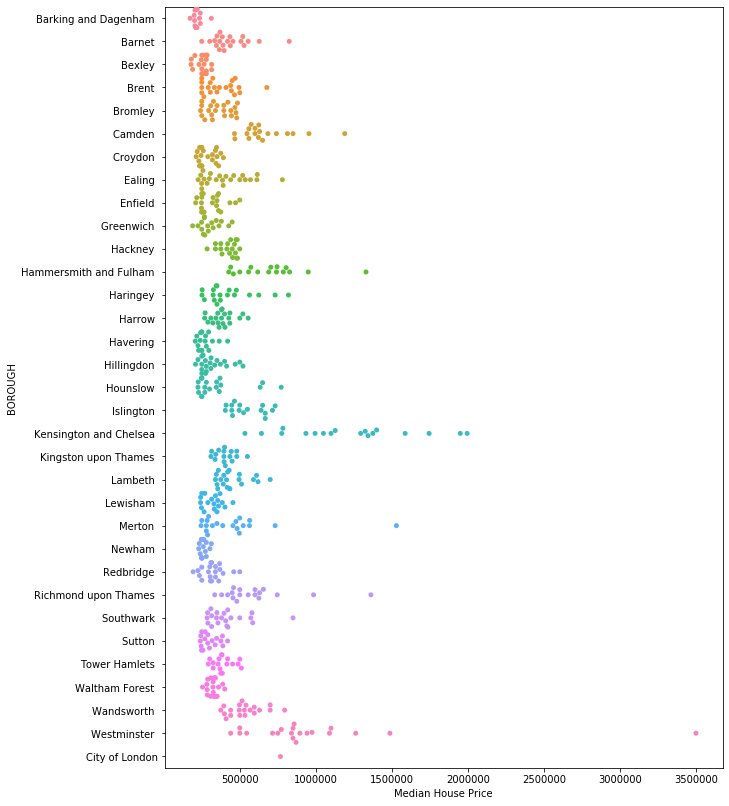

In [15]:

plt.figure(figsize=(10, 14))
sns.swarmplot(x ='Median House Price', y='BOROUGH', data=Demographics_London)
# Show plot
plt.show()

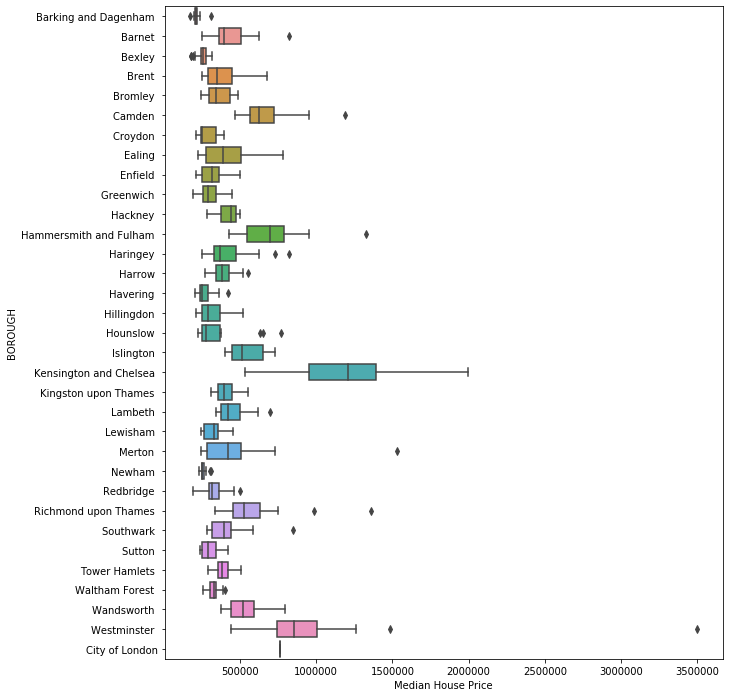

In [16]:
plt.figure(figsize=(10, 12))
sns.boxplot(x ='Median House Price', y='BOROUGH', data=Demographics_London)
plt.show()

Before selecting the features that will account the variability of median house price a new dataset was created to be included in the following **correlation matrix** and **heatmap**.  

In [17]:
datacorel = Demographics_London.drop(columns=['BOROUGH', 'Ward', 'Old code', 'ID_case', 'Ward name', 'New code', 'Population','Children aged 0-15 - 2015', 
'Working-age (16-64) - 2015', 'Rate of All Ambulance Incidents per 1,000 population - 2014',
'Rates of ambulance call outs for alcohol related illness - 2014',
'Number Killed or Seriously Injured on the roads - 2014',  'Claimant rate of key out-of-work benefits (working age client group) (2014)',
'% dependent children (0-18) in out-of-work households - 2014',
'(ID2010) - Rank of average score (within London) - 2010','(ID2010) % of LSOAs in worst 50% nationally - 2010',
'Average GCSE capped point scores - 2014', 'Unauthorised Absence in All Schools (%) - 2013',
'A-Level Average Point Score Per Student - 2013/14','A-Level Average Point Score Per Entry; 2013/14', 
'Violence against the person rate - 2014/15', 'Deliberate Fires per 1,000 population - 2014', 
'% Unemployed lone parents',  '% travel by bicycle to work - 2011', 'Sold_properties'])
datacorel.head()

,Older people aged 65+ - 2015,% Children 0-15,%_Working_age,% All Older people aged 65+ - 2015,Mean Age,Median Age,Area - Square Kilometres,Population density,% BAME,% Not Born in UK,...,Claimant Rate of Employment Support Allowance - 2014,Rate of JobSeekers Allowance (JSA) Claimants - 2015,% Unemployed adults + dependent children,% with no qualifications - 2011,% University studies,Crime rate,% Open Space,Cars per household,Average Public Transport Accessibility score - 2014,Turnout Mayoral election
0,750,25,69,5.02748,29,29,1,10500,71,57,...,4.19361,4.01547,8,16.4,34,138,21,0,5.98936,25
1,1050,25,64,10.0217,33,33,1,7428,29,24,...,7.25281,3.69079,12,31.2,16,73,20,0,3.14589,20
2,1100,25,65,8.7169,33,32,1,9269,41,30,...,6.52439,3.59319,10,28,20,79,1,0,2.87177,22
3,1450,24,61,14.1731,36,34,3,2985,37,24,...,5.86464,3.71422,10,29.1,19,76,55,0,2.26091,25
4,1550,20,65,14.2366,37,36,3,3028,24,19,...,4.56686,3.99315,6,29.9,18,66,50,1,2.30572,24


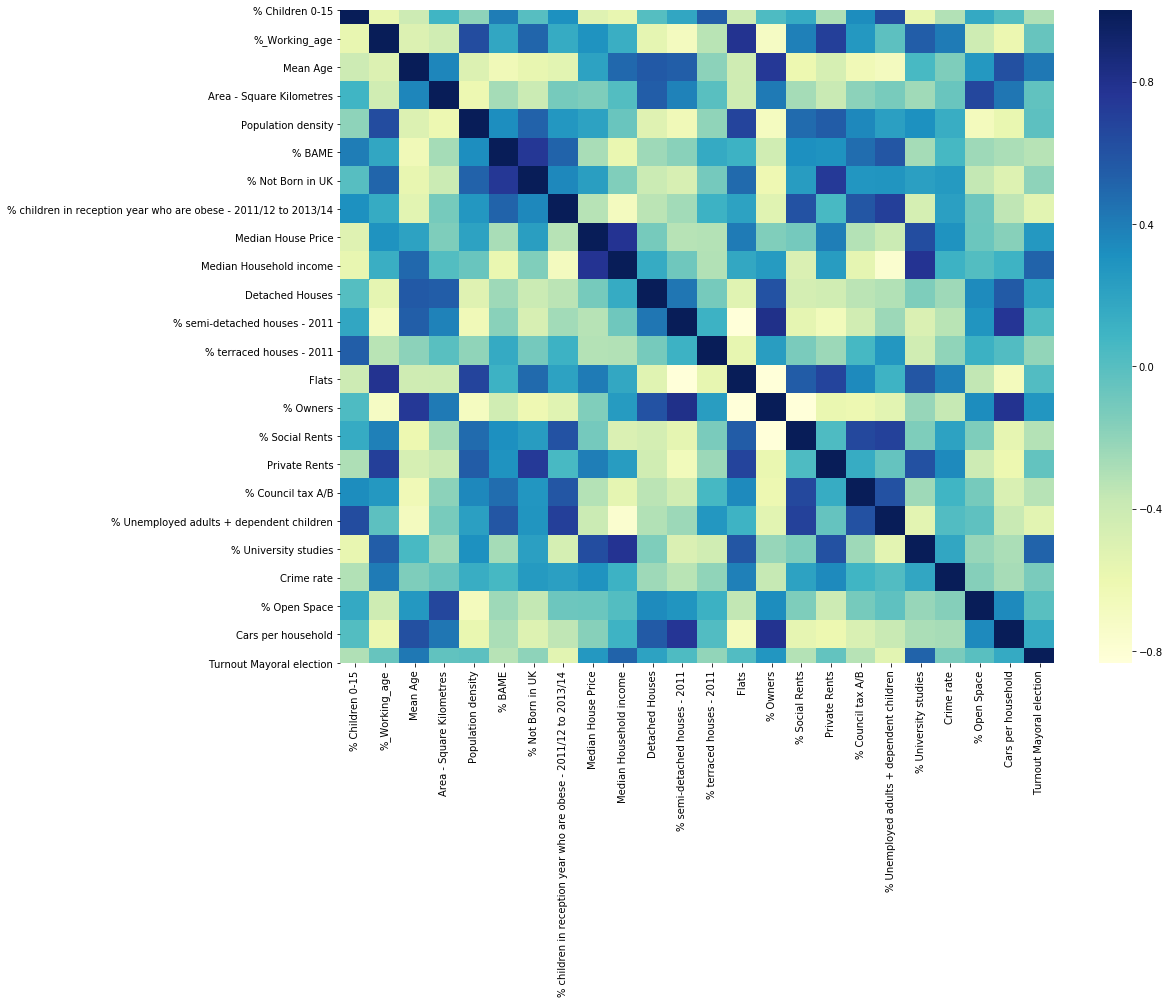

In [18]:
plt.figure(figsize = (16,12))
sns.heatmap(datacorel.corr(),annot = False, cmap="YlGnBu")

In [19]:
datacorel.corr(method='pearson').round(2)

,% Children 0-15,%_Working_age,Mean Age,Area - Square Kilometres,Population density,% BAME,% Not Born in UK,% children in reception year who are obese - 2011/12 to 2013/14,Median House Price,Median Household income,...,% Owners,% Social Rents,Private Rents,% Council tax A/B,% Unemployed adults + dependent children,% University studies,Crime rate,% Open Space,Cars per household,Turnout Mayoral election
% Children 0-15,1.00,-0.57,-0.40,0.09,-0.19,0.40,-0.00,0.31,-0.51,-0.57,...,0.04,0.15,-0.29,0.33,0.64,-0.57,-0.31,0.16,0.01,-0.30
%_Working_age,-0.57,1.00,-0.50,-0.43,0.64,0.18,0.51,0.15,0.30,0.13,...,-0.70,0.38,0.71,0.26,-0.02,0.54,0.41,-0.41,-0.59,-0.06
Mean Age,-0.40,-0.50,1.00,0.36,-0.50,-0.64,-0.57,-0.54,0.21,0.49,...,0.74,-0.60,-0.47,-0.64,-0.68,0.06,-0.14,0.26,0.62,0.43
Area - Square Kilometres,0.09,-0.43,0.36,1.00,-0.61,-0.26,-0.40,-0.11,-0.14,0.02,...,0.42,-0.26,-0.38,-0.19,-0.12,-0.25,-0.06,0.67,0.43,-0.03
Population density,-0.19,0.64,-0.50,-0.61,1.00,0.32,0.52,0.28,0.21,-0.07,...,-0.69,0.48,0.55,0.35,0.22,0.31,0.13,-0.67,-0.58,-0.02
% BAME,0.40,0.18,-0.64,-0.26,0.32,1.00,0.76,0.52,-0.28,-0.59,...,-0.43,0.31,0.30,0.48,0.58,-0.27,0.06,-0.24,-0.29,-0.32
% Not Born in UK,-0.00,0.51,-0.57,-0.40,0.52,0.76,1.00,0.35,0.23,-0.15,...,-0.62,0.24,0.74,0.28,0.29,0.22,0.26,-0.36,-0.51,-0.20
% children in reception year who are obese - 2011/12 to 2013/14,0.31,0.15,-0.54,-0.11,0.28,0.52,0.35,1.00,-0.32,-0.68,...,-0.52,0.60,0.06,0.58,0.71,-0.46,0.22,-0.08,-0.35,-0.54
Median House Price,-0.51,0.30,0.21,-0.14,0.21,-0.28,0.23,-0.32,1.00,0.77,...,-0.15,-0.10,0.40,-0.31,-0.40,0.63,0.30,-0.07,-0.17,0.27
Median Household income,-0.57,0.13,0.49,0.02,-0.07,-0.59,-0.15,-0.68,0.77,1.00,...,0.25,-0.49,0.24,-0.55,-0.77,0.77,0.11,0.02,0.10,0.52


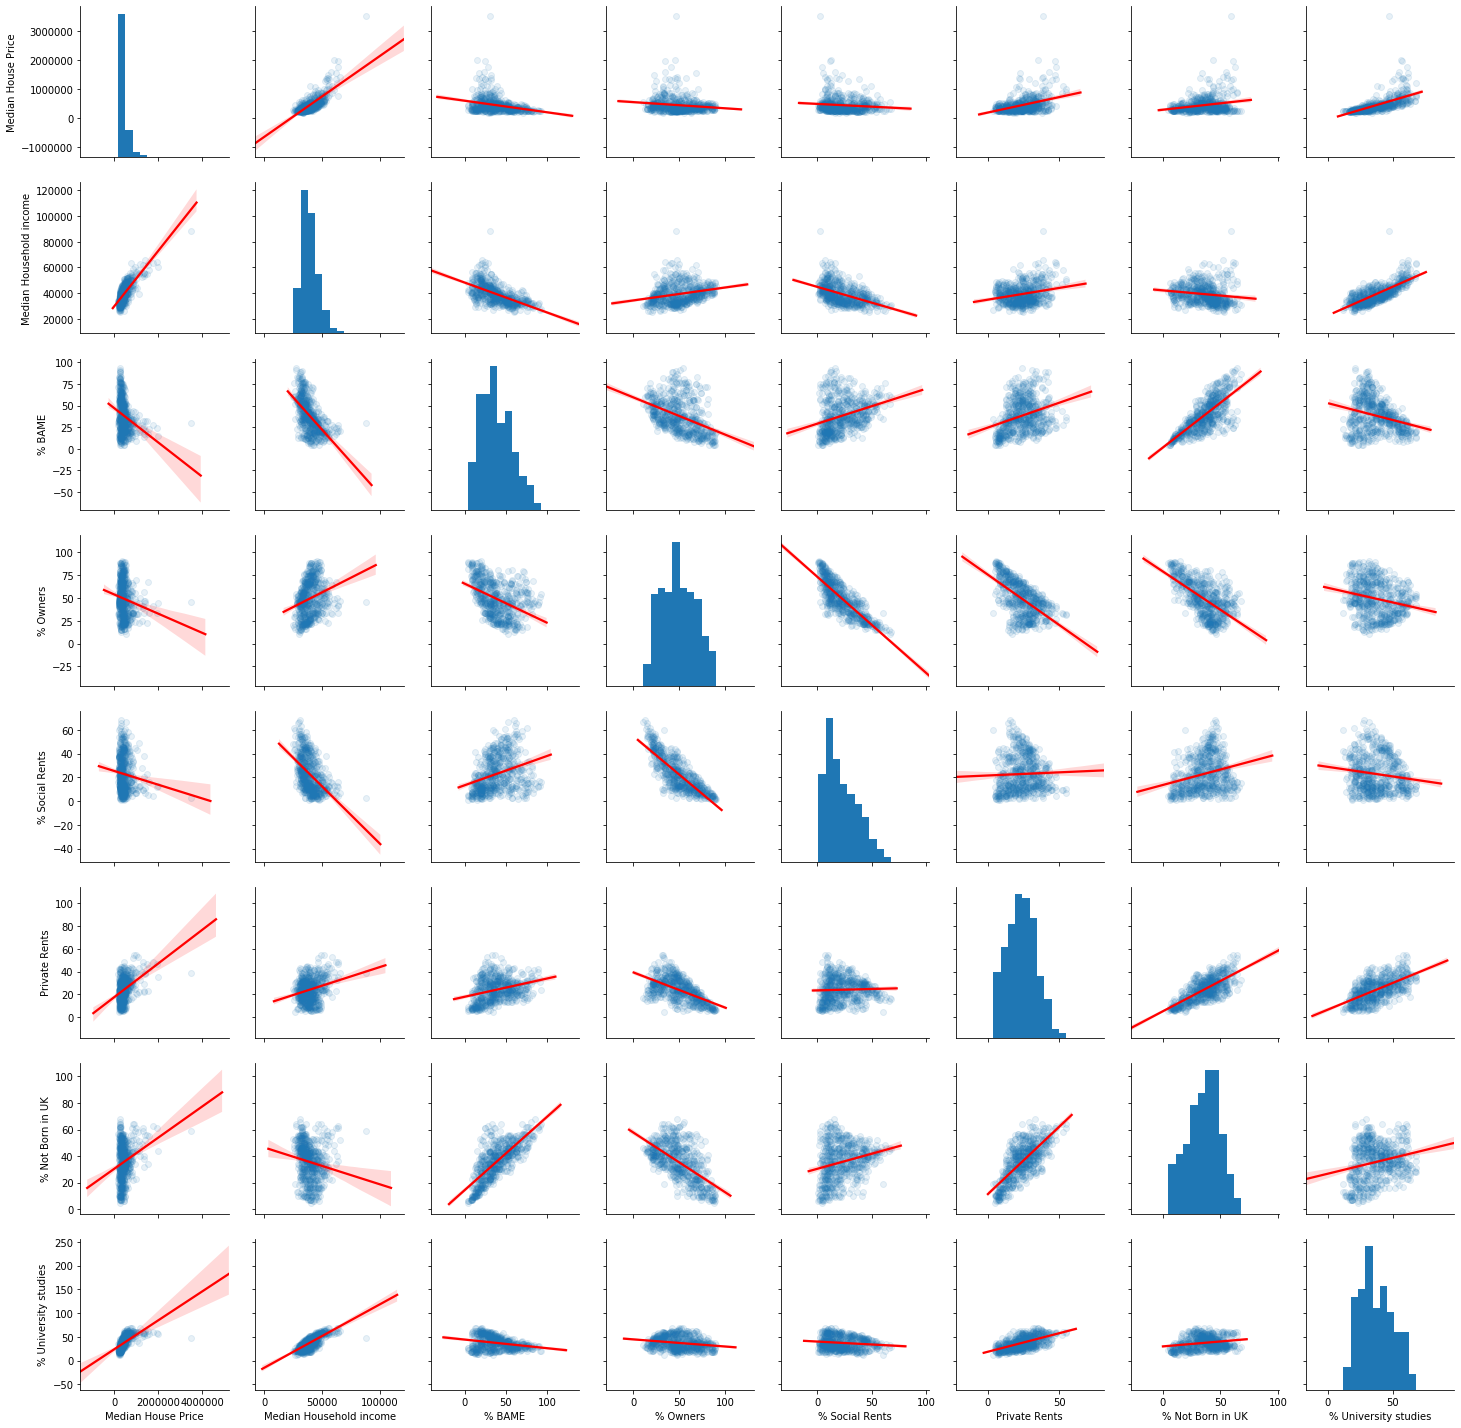

In [20]:
sns.pairplot(Demographics_London[['Median House Price', 'Median Household income', '% BAME', '% Owners', '% Social Rents', 'Private Rents', '% Not Born in UK', '% University studies']], 
             kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

Following the visualisation of association between different variables and the **Median House Price** in Ward it can be concluded the following predictors can be included in the multiple regression model: 
* Median Household income, 
* percent of **BAME**, 
* percent of **house Owners** and 
* percent of **Social Rents**, 
* percent with **Private Rents**, 
* percent with **% Not Born in UK**, and 
* percent with **University studies** in the ward. 


## Splitting the Data for Training and Testing

In [22]:
# Putting feature variable to X
#X = Demographics_London[['% Owners','% Social Rents','Private Rents', 'Population density', '% BAME', 'Number of jobs in area - 2013', 'Cars per household']]

## Define Xs and Y 

X = Demographics_London[['% BAME', 'Median Household income','% Owners', '% Social Rents', 'Private Rents', '% Not Born in UK', '% University studies']]

# Putting response variable to y
y = Demographics_London['Median House Price']

In [23]:
#random_state is the seed used by the random number generator. It can be any integer.
#from sklearn.cross_validation import train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

## Performing Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [26]:
# fit the model to the TRAINING DATA
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

In [27]:
# print the intercept
print(lm.intercept_)

230558.4052435651


In [28]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
% BAME,-3403.403489
Median Household income,48.390396
% Owners,-17755.574266
% Social Rents,-11162.882482
Private Rents,-19104.288401
% Not Born in UK,12617.225933
% University studies,-11384.093216


In [29]:
# Making predictions using the model on the TEST dataset
y_pred = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

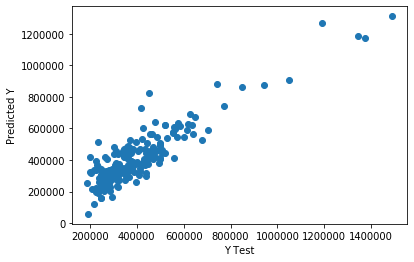

In [30]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

The chart above shows the scatterplot of outcome variable from the test dataset against the predicted outcome variable. The strong positive correlation indicates the model is very strong.  

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [32]:
#print('Mean_Squared_Error :' ,mse)
#print('r_square_value :',r_squared)

# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred).round(3))
print('Error in %:', (np.mean(y_test - y_pred) / np.mean(y_pred)) * 100)
print('MSE:', metrics.mean_squared_error(y_test, y_pred).round(3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R square :',r_squared)


MAE: 66885.451
Error in %: -2.788153794038629
MSE: 7821225887.348
RMSE: 88437.69494592144
R square : 0.7995845486211532


The model explains 88% of the variance of the target variable. On average, predictions have an error of 66,885£ or they’re wrong by 278%. This suggest some of the extreme values should be excluded from analysis. 

In [33]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
#lm_1.params

C:\Users\nastu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [34]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:     Median House Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     453.5
Date:                Fri, 19 Jun 2020   Prob (F-statistic):          8.25e-194
Time:                        00:15:17   Log-Likelihood:                -5654.8
No. Observations:                 437   AIC:                         1.133e+04
Df Residuals:                     429   BIC:                         1.136e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Percent of BAME** (ethnic minorities) in the ward is associated with a significant **decrease in median price of 3,403£ thousand**.
- Holding all other features fixed, a 1 unit **(£)** increase in **Median household income** is associated with a significant **increase of 48 £ in price**.
- Holding all other features fixed, a 1 % increase of **house owners in the ward** is associated with a significant **decrease in price of 17,760 £**.
- Holding all other features fixed, a 1 % increase in **Social rents in the ward** is associated with a significant **decrease in price of 11,160 £**.
- Holding all other features fixed, a 1 % increase in **Private rents in the ward** is associated with a significant **decrease in price of 19,100 £**.
- Holding all other features fixed, a 1 % increase in those **born abroad** is associated with a significant **increase in price of 12,620 £**.
- Holding all other features fixed, a 1 % increase in **Highly educated people in the ward** is associated with a significant **decrease in price of 11,380 £**.

The histogram of the error values indicate these are approximatelly normally distributed. 

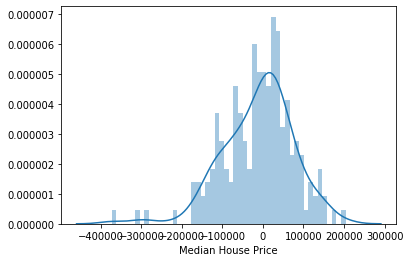

In [35]:
sns.distplot((y_test - y_pred),bins=50);

### Conclusion 

The above *Jupyter notebook* revealed that someone can confidently predict the **median house price** in London wards taking into account the ethnic structure (**% BAME** and **% people born abroad**), the proportion of **private** and **social rents** and **house owners** and the **proportion of highly educated** people can account almost 90% of th the median house price. The most might be improved even more in a further notebook.    

* If you read this Notebook please email me any comments or suggestions to my email sebastian@bianalytics.org